# CSV Writer

To write data into a CSV file, we follow these steps:
1. Open the CSV file for writing (w mode) by using the open() function.
2. Create a CSV writer object by calling the writer() function of the csv module.
3. Write data to CSV file by calling the writerow() or writerows() method of the CSV writer object.
4. Close the file once we complete writing data to it.

The following code illustrates the above steps:

```python
# open the file in the write mode

with open('path/to/csv_file', 'w', encoding='UTF8') as f:
    
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(row)
```

In [22]:
import csv
import os

# Step 1: Define the directory path and create it if it doesn’t exist
directory = "resources"
if not os.path.exists(directory):
    os.makedirs(directory)

# Step 2: Define the file path and write content to the file
file_path = os.path.join(directory, "countries.csv")

header = ['name', 'area', 'country_code2', 'country_code3']
data = ['Afghanistan', 652090, 'AF', 'AFG']

with open(file_path,'w',encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

If we see blank line between two subsequent rows like below 

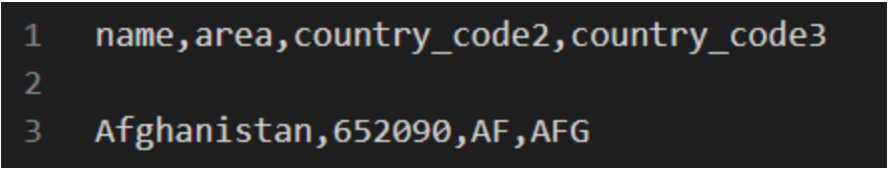

we can pass the keyword argument newline='' to the open() function as follows:

```python

open('path/to/csv_file', 'w', encoding='UTF8', newline='')

```

## Writing multiple rows to CSV files

To write multiple rows to a CSV file at once, we use the ``writerows()`` method of the CSV ``writer`` object.

In [23]:
header = ['name', 'area', 'country_code2', 'country_code3']
data = [
    ['Albania', 28748, 'AL', 'ALB'],
    ['Algeria', 2381741, 'DZ', 'DZA'],
    ['American Samoa', 199, 'AS', 'ASM'],
    ['Andorra', 468, 'AD', 'AND'],
    ['Angola', 1246700, 'AO', 'AGO']
]

with open(file_path,'w',encoding='UTF8',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

If each row of the CSV file is a dictionary, we can use the ``DictWriter`` class of the csv module to write the dictionary to the CSV file.

In [24]:
fieldnames = ['name', 'area', 'country_code2', 'country_code3']

rows = [
    {'name': 'Albania',
    'area': 28748,
    'country_code2': 'AL',
    'country_code3': 'ALB'},
    {'name': 'Algeria',
    'area': 2381741,
    'country_code2': 'DZ',
    'country_code3': 'DZA'},
    {'name': 'American Samoa',
    'area': 199,
    'country_code2': 'AS',
    'country_code3': 'ASM'}
]

with open(file_path, 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

# CSV Reader

1. Import the csv module:

    ```import csv```

2. Open the CSV file using the built-in ```open()``` function in the read mode:

    ```f = open('path/to/csv_file')```

    ##### If the CSV contains UTF8 characters, we need to specify the encoding like this:

    ```f = open('path/to/csv_file', encoding='UTF8')```

3. Pass the file object (f) to the reader() function of the csv module. The reader() function returns a csv reader object:

    ```csv_reader = csv.reader(f)```

4. The csv_reader is an iterable object of lines from the CSV file. Therefore, we can iterate over the lines of the CSV file using a for loop:

        for line in csv_reader:
            print(line)

    ##### Each line is a list of values. To access each value, we use the square bracket notation []. The first value has an index of 0. The second value has an index of 1, and so on.

    ##### For example, the following accesses the first value of a particular line:

    ````line[0]````

5. Finally, always close the file once we’re no longer access it by calling the close() method of the file object:

    ````f.close()````    

It’ll be easier to use the with statement so that we don’t need to explicitly call the close() method.

In [26]:
# Example 1 : Reading a CSV file examples

with open(file_path, encoding="utf8") as f:
    csv_reader = csv.reader(f)
    for line in csv_reader:
        print(line)

['name', 'area', 'country_code2', 'country_code3']
['Albania', '28748', 'AL', 'ALB']
['Algeria', '2381741', 'DZ', 'DZA']
['American Samoa', '199', 'AS', 'ASM']


In [27]:
# Example 2 : Skip first line (Header) using enumerate function 

with open(file_path, encoding="utf8") as f:
    csv_reader = csv.reader(f)
    for line_no,line in enumerate(csv_reader):
        if line_no == 0:
            continue
        else:
            print(line)

['Albania', '28748', 'AL', 'ALB']
['Algeria', '2381741', 'DZ', 'DZA']
['American Samoa', '199', 'AS', 'ASM']


In [28]:
# Example 3 : Skip first line (Header) using next() function 

with open(file_path, encoding="utf8") as f:
    csv_reader = csv.reader(f)
    next(csv_reader)
    for line in csv_reader:
        print(line)

['Albania', '28748', 'AL', 'ALB']
['Algeria', '2381741', 'DZ', 'DZA']
['American Samoa', '199', 'AS', 'ASM']


In [30]:
# Example 4 : Read country.csv to calculate total areas of all countries

from functools import reduce

def calculate_total(a,b):
    return a+b


with open(file_path, encoding="utf8") as f:
    csv_reader = csv.reader(f)
    next(csv_reader)

    country_areas = [float(line[1]) for line in csv_reader]
    # print(country_areas)

    total_area = reduce(calculate_total,country_areas)
    print(f'Total area of all countries in country.csv is {total_area}')

Total area of all countries in country.csv is 2410688.0


# DictReader class

When we use the ```csv.reader()``` function, we can access values of the CSV file using the bracket notation such as ```line[0]```, ```line[1]```, and so on. However, using the ```csv.reader()``` function has two main limitations:

However it would be more expressive if we can access the country name like ```line['country_name']```.

Second, when the order of columns from the CSV file is changed or new columns are added, we need to modify the code to get the right data.

This is where the ```DictReader``` class comes into play. 

The DictReader class also comes from the csv module.

The ```DictReader``` class allows us to create an object like a regular CSV reader. 

But it maps the information of each line to a dictionary (dict) whose keys are specified by the values of the first line.

By using the DictReader class, we can access values in the country.csv file like ```line['name']```, ```line['area']```, ```line['country_code2']```, and ```line['country_code3']```.

or if we want to have different field names other than the ones specified in the first line, we can explicitly specify them by passing a list of field names to the DictReader() constructor like this:

```fieldnames = ['country_name', 'area', 'code2', 'code3']```


In [31]:
# Example 1 : Reading a CSV file using Dict_reader

with open(file_path, encoding="utf8") as f:
    csv_reader = csv.DictReader(f)
    
    next(csv_reader)

    for line in csv_reader:
        print(f'The area of {line['name']} is {line['area']} km2')

The area of Algeria is 2381741 km2
The area of American Samoa is 199 km2


In [32]:
# Example 2 : Reading a CSV file using Dict_reader and custom field names

with open(file_path, encoding="utf8") as f:
    
    fieldnames = ['Name', 'Area', 'Code2', 'Code3']
    csv_reader = csv.DictReader(f,fieldnames)

    
    
    next(csv_reader)

    for line in csv_reader:
        print(f'The area of {line['Name']} is {line['Area']} km2')


The area of Albania is 28748 km2
The area of Algeria is 2381741 km2
The area of American Samoa is 199 km2
